In [10]:
import pickle
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
with open('/content/drive/MyDrive/kNN_data.pkl', 'rb') as file:
  data_loaded = pickle.load(file)

X = data_loaded['X']
X_test = data_loaded['X_test']
y = data_loaded['y']
y_test = data_loaded['y_test']

In [4]:
X

array([[-0.51198289,  2.96465545,  1.56003759, ...,  1.88382445,
         1.2871477 ,  0.02065852],
       [ 8.20135097,  7.1233988 , -2.74359592, ...,  3.00120229,
         2.63636365, -1.02797662],
       [ 3.11316313, -7.93516487, -5.85519767, ...,  3.21156553,
         2.3508674 ,  1.88540704],
       ...,
       [ 3.71950955, 12.07264553, -3.72413365, ...,  5.04651566,
         0.23859553,  0.86497256],
       [ 2.73705288, -0.95971681,  6.7423966 , ...,  1.6972671 ,
        -1.75277933, -2.70699182],
       [-3.71639109,  5.4324383 ,  1.34561924, ...,  3.60683868,
         4.50187658, -2.89873973]])

In [9]:
X.shape

(1000, 10)

In [11]:
validation_accuracies = []

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    knn_classifier.fit(X_train_fold, y_train_fold)

    y_val_pred = knn_classifier.predict(X_val_fold)

    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    validation_accuracies.append(val_accuracy)


print("Validation Accuracies for k=5 (5-fold CV):", validation_accuracies)
print("Mean Validation Accuracy for k=5 (5-fold CV):", sum(validation_accuracies) / len(validation_accuracies))

knn_classifier.fit(X, y)

y_train_pred = knn_classifier.predict(X)

in_sample_error = 1 - accuracy_score(y, y_train_pred)

y_test_pred = knn_classifier.predict(X_test)

out_sample_error = 1 - accuracy_score(y_test, y_test_pred)

print("\nIn-sample error (training error) for k=5:", in_sample_error)
print("Out-sample error (test error) for k=5:", out_sample_error)

Validation Accuracies for k=5 (5-fold CV): [0.84, 0.825, 0.875, 0.81, 0.895]
Mean Validation Accuracy for k=5 (5-fold CV): 0.849

In-sample error (training error) for k=5: 0.09599999999999997
Out-sample error (test error) for k=5: 0.22199999999999998


Question 4

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
class_indices = np.where((y == 0) | (y == 1))[0]
X_subset = X[class_indices]
y_subset = y[class_indices]

test_class_indices = np.where((y_test == 0) | (y_test == 1))[0]
X_test_subset = X_test[test_class_indices]
y_test_subset = y_test[test_class_indices]

In [15]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_subset, y_subset)

y_test_pred = logistic_regression.predict(X_test_subset)

test_accuracy = accuracy_score(y_test_subset, y_test_pred)
print("Test Accuracy:", test_accuracy)

conf_matrix = confusion_matrix(y_test_subset, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.990521327014218
Confusion Matrix:
[[ 83   2]
 [  0 126]]


Text(95.72222222222221, 0.5, 'True_val')

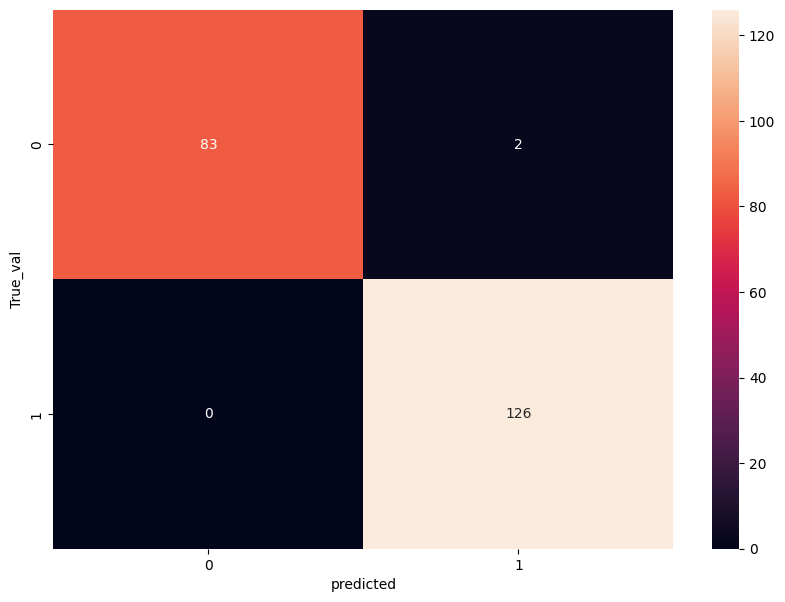

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True_val')
